## 1. Introduction
The objective of this notebook is to present an exploratory data analysis and visualization about [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/).


### 1.1 About the Dataset 
The [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/) dataset contains unique records about customers and their attributes. The purpose is to determine which customer will stop doing business with the company, a concept known as churn.


---
### 1.1 Dataset Description

<style>
  table {
    font-size: 0.75em;
    border-collapse: collapse;
  }
  th, td {
    padding: 4px 6px;
    border: 1px solid #ccc;
  }
</style>

| Feature Name      | Description                                                      | Data Type      | Possible Values                                  |
|-------------------|------------------------------------------------------------------|----------------|-------------------------------------------------|
| CustomerID        | Contains customer ID                                             | categorical    | Unique value for each customer                                             |
| gender            | Whether the customer female or male                             | categorical    | Female, Male                                    |
| SeniorCitizen     | Whether the customer is a senior citizen or not                | numeric, int   | 0, 1                                           |
| Partner           | Whether the customer has a partner or not                       | categorical    | Yes, No                                        |
| Dependents        | Whether the customer has dependents or not                      | categorical    | Yes, No                                        |
| tenure            | Number of months the customer has stayed with the company       | numeric, int   | —                                               |
| PhoneService      | Whether the customer has a phone service or not                 | categorical    | Yes, No                                        |
| MultipleLines     | Whether the customer has multiple lines or not                  | categorical    | Yes, No, No phone service                       |
| InternetService   | Customer’s internet service provider                            | categorical    | DSL, Fiber optic, No                            |
| OnlineSecurity    | Whether the customer has online security or not                 | categorical    | Yes, No, No internet service                    |
| OnlineBackup      | Whether the customer has online backup or not                   | categorical    | Yes, No, No internet service                    |
| DeviceProtection  | Whether the customer has device protection or not               | categorical    | Yes, No, No internet service                    |
| TechSupport       | Whether the customer has tech support or not                    | categorical    | Yes, No, No internet service                    |
| streamingTV       | Whether the customer has streaming TV or not                    | categorical    | Yes, No, No internet service                    |
| streamingMovies   | Whether the customer has streaming movies or not                | categorical    | Yes, No, No internet service                    |
| Contract          | The contract term of the customer                               | categorical    | Month-to-month, One year, Two year              |
| PaperlessBilling  | Whether the customer has paperless billing or not               | categorical    | Yes, No                                        |
| PaymentMethod     | The customer’s payment method                                   | categorical    | Electronic check, Mailed check, Bank transfer, Credit card |
| MonthlyCharges    | The amount charged to the customer monthly                      | numeric, float   | —                                               |
| TotalCharges      | The total amount charged to the customer                        | numeric, float         | —                                               |
| Churn             | Whether the customer churned or not                             | categorical    | Yes, No                                        |


---
## 2. Import Libraries / Settings

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Settings
%matplotlib inline
pd.set_option('display.max_columns', None)      
warnings.filterwarnings('ignore')

# Set the path to the dataset 
notebook_path = Path.cwd()
data_path = notebook_path.parent / "notebooks" / "data" / "00_churn_raw_data.csv"

---
## 3. Data comprehension

In [2]:
# Import the dataset
data = pd.read_csv(data_path)

# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Convert all lines to lowercase
data = data.applymap(lambda s: s.lower() if type(s) == str else s)   #type: ignore

# Display the first 5 rows of the dataset
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [3]:
# Shape of the dataset
print(f"{data.shape[0]} rows, {data.shape[1]} columns")

7043 rows, 21 columns


In [4]:
# Verify the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
# Check duplicates
num_duplicates = data.duplicated().sum()                      
duplicate_indices = data[data.duplicated()].index.tolist()   

print(f"nm of duplicate rows: {num_duplicates}")
print(f"index of duplicate rows: {duplicate_indices}")

nm of duplicate rows: 0
index of duplicate rows: []


In [6]:
# Check for missing values in the dataset
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## 3. Pre-Process

### 3.1 Customer ID
We don´t need the customerid since it´s a unique identifier for each customer

In [7]:
data = data.drop(['customerid'], axis = 1)
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


### 3.2 Total Charges
When attempting to convert the `totalcharges` column to a numeric type, I encountered the following error:  
"could not convert string to float: ' '."

This indicates that, although `data.isnull().sum()` showed no missing values in this column, there are actually some entries with blank strings (`' '`).

In [8]:
# Check the minimum value of totalcharges before fill the NaN values.
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')
print(f"Minimum value of totalcharges: {data['totalcharges'].min()}")

Minimum value of totalcharges: 18.8


In [9]:
# Check for missing values again after conversion
print(data['totalcharges'].isna().sum())

11


In [10]:
# Transform totalcharges nan to 0
data['totalcharges'] = data['totalcharges'].fillna(0)

In [11]:
# Check for missing values again after filling NaN
print(data['totalcharges'].isna().sum())

0


All 0 values in `totalcharges` correspond to entries where `tenure` is 0 and there is no churn.

Since this is a telecom company, I will assume that billing happens after the first full month. Therefore, if the customer hasn't completed a full month `tenure = 0`, the `total charge = 0`.

An alternative approach could be to delete these rows (which I believe is not ideal). In a real case scenario, I would investigate with the root cause of the missing values.

In [12]:
a = data[data['tenure'] == 0]
a

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,female,0,yes,yes,0,no,no phone service,dsl,yes,no,yes,yes,yes,no,two year,yes,bank transfer (automatic),52.55,0.0,no
753,male,0,no,yes,0,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.25,0.0,no
936,female,0,yes,yes,0,yes,no,dsl,yes,yes,yes,no,yes,yes,two year,no,mailed check,80.85,0.0,no
1082,male,0,yes,yes,0,yes,yes,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,0.0,no
1340,female,0,yes,yes,0,no,no phone service,dsl,yes,yes,yes,yes,yes,no,two year,no,credit card (automatic),56.05,0.0,no
3331,male,0,yes,yes,0,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,19.85,0.0,no
3826,male,0,yes,yes,0,yes,yes,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.35,0.0,no
4380,female,0,yes,yes,0,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.00,0.0,no
5218,male,0,yes,yes,0,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,one year,yes,mailed check,19.70,0.0,no
6670,female,0,yes,yes,0,yes,yes,dsl,no,yes,yes,yes,yes,no,two year,no,mailed check,73.35,0.0,no


It´s interesting to identify the values they have in common with each other (partner, dependents, phone service, no internet service, long term contract, etc.)

### 3.3 Replace values

In [13]:
# seniorcitizen to yes/no
data['seniorcitizen'] = data['seniorcitizen'].map({0: 'no', 1: 'yes'})

# Replace values in paymentmethod 
data['paymentmethod'] = data['paymentmethod'].replace({"bank transfer (automatic)": "bank transfer",
                                                      "credit card (automatic)": "credit card"})

# Replace values in contract
data['contract'] = data['contract'].replace({"month-to-month": "monthly"})

### 3.4 Describe

In [14]:
# Describe the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
totalcharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


Tenure > 25% of customers have been with the company for less than 9 months, while another 25% have stayed for more than 55 months. This indicates the presence of both very new customers and long-term customers.

Monthly Charges > The range between the 25th and 75th percentiles also shows that some customers pay much more than others.

Total Charges > The range goes from 0 to 8,684, but this is partly because I manually filled in some missing data. The minimum before the change was 18.8, and I only filled 11 rows, so I don’t believe it significantly affected the overall distribution.  
Also, the large variation in values is consistent with the fact that total charges are influenced by both tenure and monthly charges.


In [15]:
# Check the possible values for non-numeric columns and see if i´m not missing anything
for col in data.select_dtypes(include=['object', 'category']).columns:
    unique_vals = data[col].unique()
    print(f"Column: {col}")
    print("Possible values:")
    print(unique_vals)
    print()

Column: gender
Possible values:
['female' 'male']

Column: seniorcitizen
Possible values:
['no' 'yes']

Column: partner
Possible values:
['yes' 'no']

Column: dependents
Possible values:
['no' 'yes']

Column: phoneservice
Possible values:
['no' 'yes']

Column: multiplelines
Possible values:
['no phone service' 'no' 'yes']

Column: internetservice
Possible values:
['dsl' 'fiber optic' 'no']

Column: onlinesecurity
Possible values:
['no' 'yes' 'no internet service']

Column: onlinebackup
Possible values:
['yes' 'no' 'no internet service']

Column: deviceprotection
Possible values:
['no' 'yes' 'no internet service']

Column: techsupport
Possible values:
['no' 'yes' 'no internet service']

Column: streamingtv
Possible values:
['no' 'yes' 'no internet service']

Column: streamingmovies
Possible values:
['no' 'yes' 'no internet service']

Column: contract
Possible values:
['monthly' 'one year' 'two year']

Column: paperlessbilling
Possible values:
['yes' 'no']

Column: paymentmethod
Possible

In [16]:
# to csv
data.to_csv(notebook_path.parent / "notebooks" / "data" / "01_churn_eda_data.csv", index=False)

## 4. Data Visualization

### 4.1 Categorical

In [17]:
def plot_cat_vs_churn_multi_pies(data, 
                                 column):
    """
    Plots multiple pie charts showing the churn distribution for each category of a given categorical variable,
    and a bar chart comparing churn counts across categories, centered next to the pie charts.

    Parameters
    ----------
    data : pandas.DataFrame
        The DataFrame containing the data, including the 'churn' column and the categorical variable of interest.
    column : str
        The name of the categorical column to analyze.

    Returns
    -------
    None. Displays the charts directly.
    """

    colors_pie = ['#4E79A7', '#F28E2B']
    colors_bar = ['#59A14F', '#E15759']

    # Crosstabulate the data
    crosstab = pd.crosstab(data[column], 
                           data['churn'])
    n_cats = len(crosstab)
    n_cols = 2
    n_rows = (n_cats + n_cols - 1) // n_cols

    # Criar a figura e eixos
    fig, axes = plt.subplots(n_rows, 
                             n_cols + 1, 
                             figsize=(6*(n_cols+1), 5*n_rows))
    axes = np.array(axes).reshape(n_rows, n_cols + 1)

    # --- Pie Charts --- #
    for idx, cat in enumerate(crosstab.index):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        ax.pie(
            crosstab.loc[cat],
            labels=crosstab.columns,
            autopct='%1.1f%%',
            colors=colors_pie,
            startangle=90,
            wedgeprops={'edgecolor': 'white'}
        )
        ax.set_title(f'{column.title()} = {cat}\nChurn Distribution')

    # Remove axes not used for pie charts
    for idx in range(n_cats, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')

    # --- Bar Chart --- #
    # Centralize the bar chart in the last column of the middle row
    bar_row = n_rows // 2 if n_rows > 1 else 0
    bar_ax = axes[bar_row, -1]

    crosstab.plot(
        kind='bar',
        stacked=False,
        color=colors_bar,
        edgecolor='black',
        ax=bar_ax
    )

    # Set the title and labels for the bar chart
    bar_ax.set_title(f'{column.title()} vs Churn')
    bar_ax.set_xlabel(column.title())
    bar_ax.set_ylabel('Number of Customers')

    # Add legend to the bar chart
    bar_ax.legend(title='Churn', 
                  loc='upper left', 
                  bbox_to_anchor=(1.05, 1), 
                  borderaxespad=0.)

    # Bar chart annotations
    for p in bar_ax.patches:
        height = p.get_height()
        if height > 0:
            bar_ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2, height),
                            ha='center', 
                            va='bottom', 
                            fontsize=10, 
                            color='black')

    # Remove axes not used for the bar chart
    for r in range(n_rows):
        if r != bar_row:
            axes[r, -1].axis('off')

    # Adjust layout 
    plt.subplots_adjust(wspace=0.3, 
                        hspace=0.4, 
                        right=0.85)

    plt.show()

In [18]:
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### 4.1.1 Churn

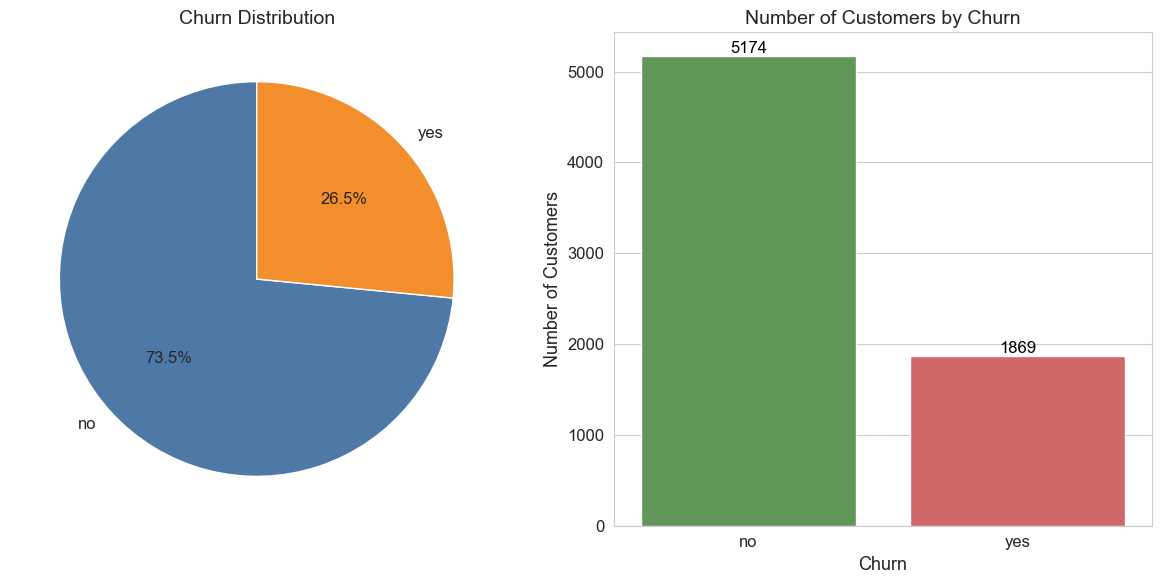

In [19]:
# Check the distribution of the 'churn' column
count_churn = data['churn'].value_counts().reset_index()
count_churn.columns = ['Churn', 'Count']

# Color palette for the pie and bar charts
colors_pie = ['#4E79A7', '#F28E2B']
colors_bar = ['#59A14F', '#E15759']

# Set the style for the plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 13})

# Create the figure and axes for the pie and bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Pie Chart --- #
axes[0].pie(
    count_churn['Count'],
    labels=count_churn['Churn'],
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('Churn Distribution')

# --- Bar Chart --- #
sns.barplot(
    x='Churn',
    y='Count',
    data=count_churn,
    palette=colors_bar,
    ax=axes[1]
)

# Add labels to the bars
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=12, color='black')

axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Churn')
axes[1].set_title('Number of Customers by Churn')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The dataset is unbalanced in a near about 3:1 ratio for Not-Churn : Churn customers.

### 4.1.2 Gender

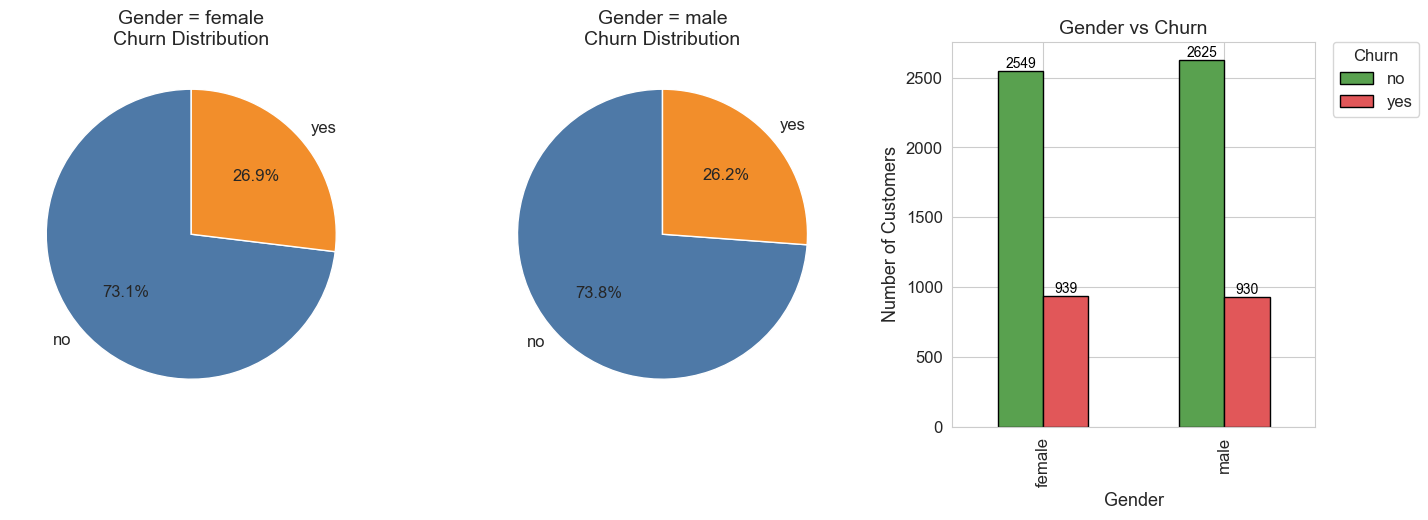

In [20]:
plot_cat_vs_churn_multi_pies(data, 'gender')

Churn rates are nearly equal between males and females, so I think we can assume gender doesn't play a role in churn.

### 4.1.3 Senior Citizen

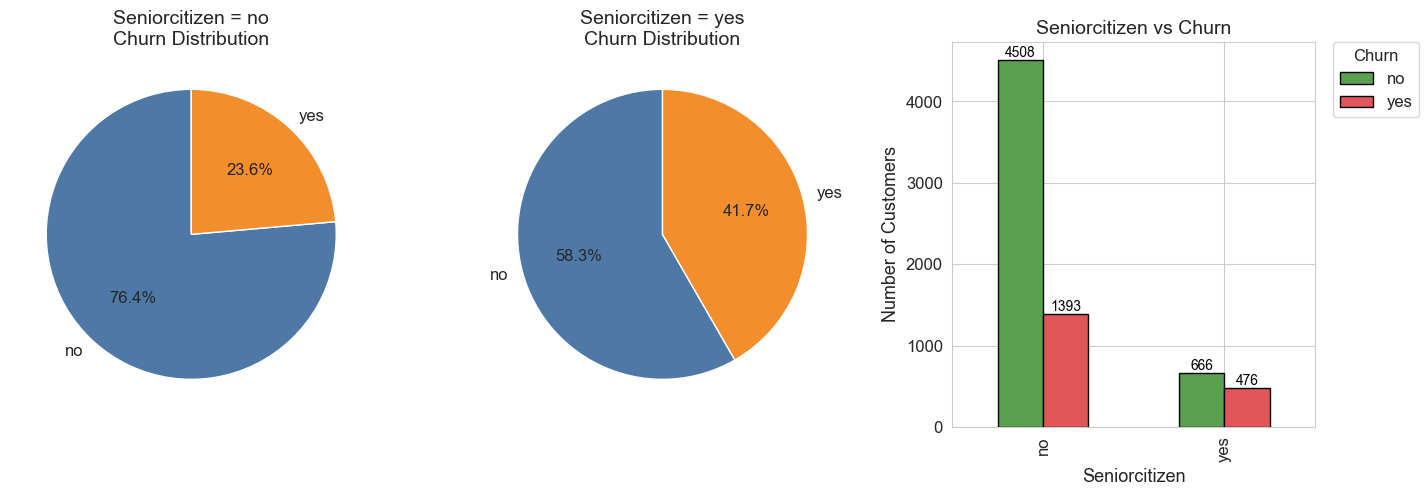

In [21]:
plot_cat_vs_churn_multi_pies(data, 'seniorcitizen')

If the customer is a senior citizen, there is a higher chance of churn. This can happen due to lower familiarity with technology, and since we don't know the exact age of these individuals, we can also assume some may have passed away.

### 4.1.4 Partner

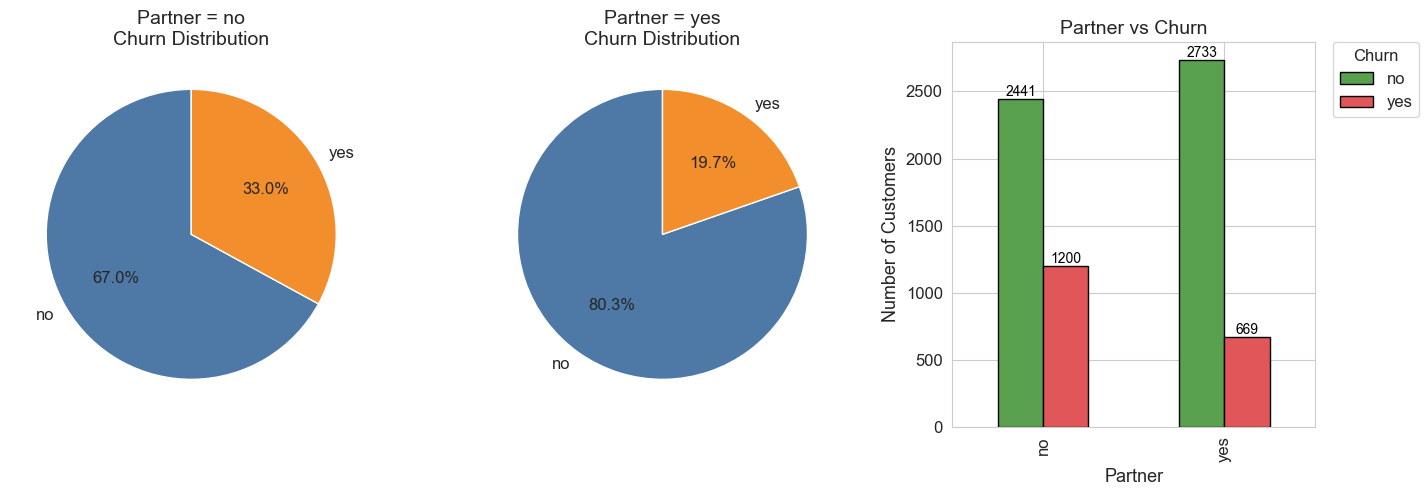

In [22]:
plot_cat_vs_churn_multi_pies(data, 'partner')

In [23]:
print(data.groupby(['partner', 'multiplelines'])['churn'].value_counts())

partner  multiplelines     churn
no       no                no       1372
                           yes       609
         no phone service  no        262
                           yes       109
         yes               no        807
                           yes       482
yes      no                no       1169
                           yes       240
         no phone service  no        250
                           yes        61
         yes               no       1314
                           yes       368
Name: count, dtype: int64


If the customer has a partner, there is a lower chance of churn.
I assume there might be some benefits or discounts for people who have multiple lines, but we don’t have this information.
On the other hand, we can see that the highest churn occurs among people without partners who have multiple lines.

### 4.1.5 Dependents

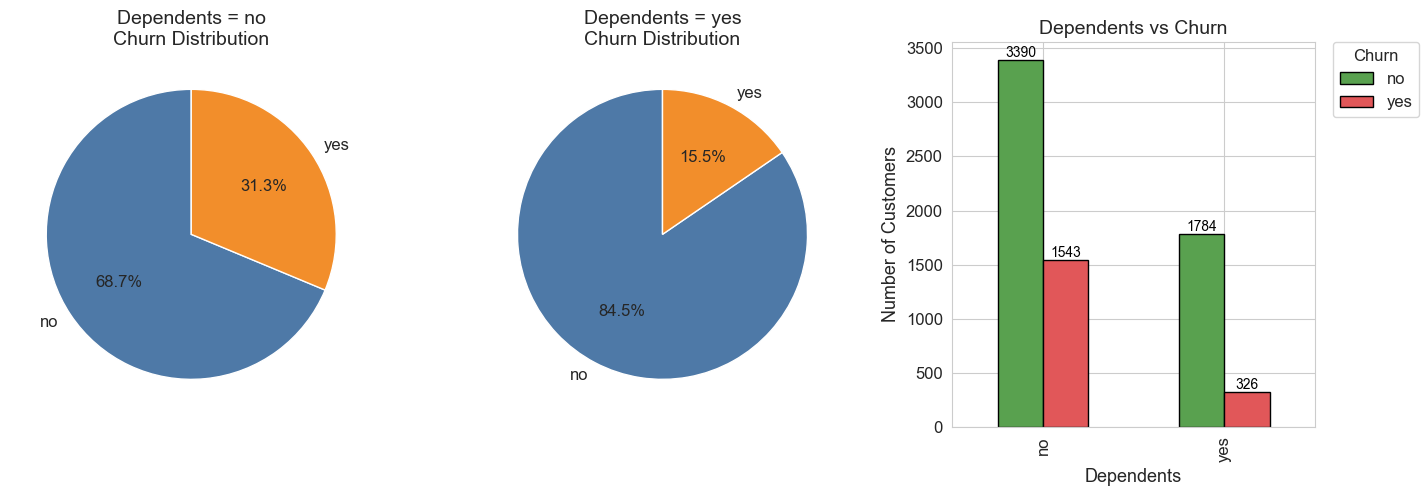

In [24]:
plot_cat_vs_churn_multi_pies(data, 'dependents')

Clients with dependents churn less. This could be due to the fact that they have more stable financial situations, family commitments that encourage them to stay with the service provider, or people don´t want to deal with the bureaucracy of change the service for all members. 

### 4.1.6 PhoneService

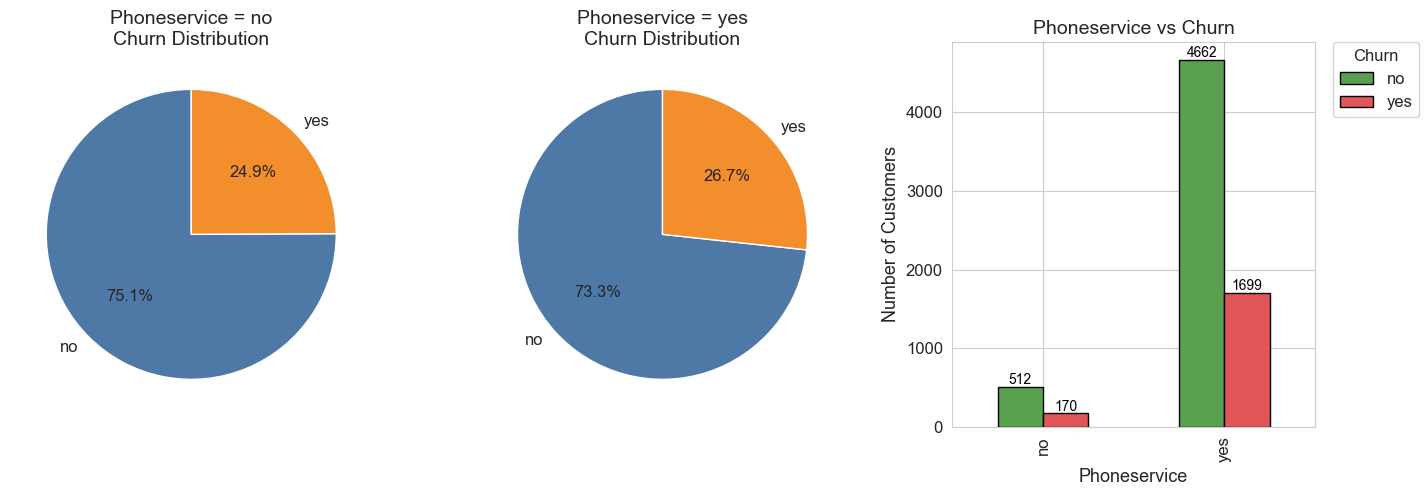

In [25]:
plot_cat_vs_churn_multi_pies(data, 'phoneservice')

The % of churn distribution it´s close to each other between customers with and without phone service, but it is slightly higher for those with phone service. This could be due to the fact that customers with phone service may not be as satisfied with their overall service or change to other company with better benefits/less price.

### 4.1.7 Multiplelines

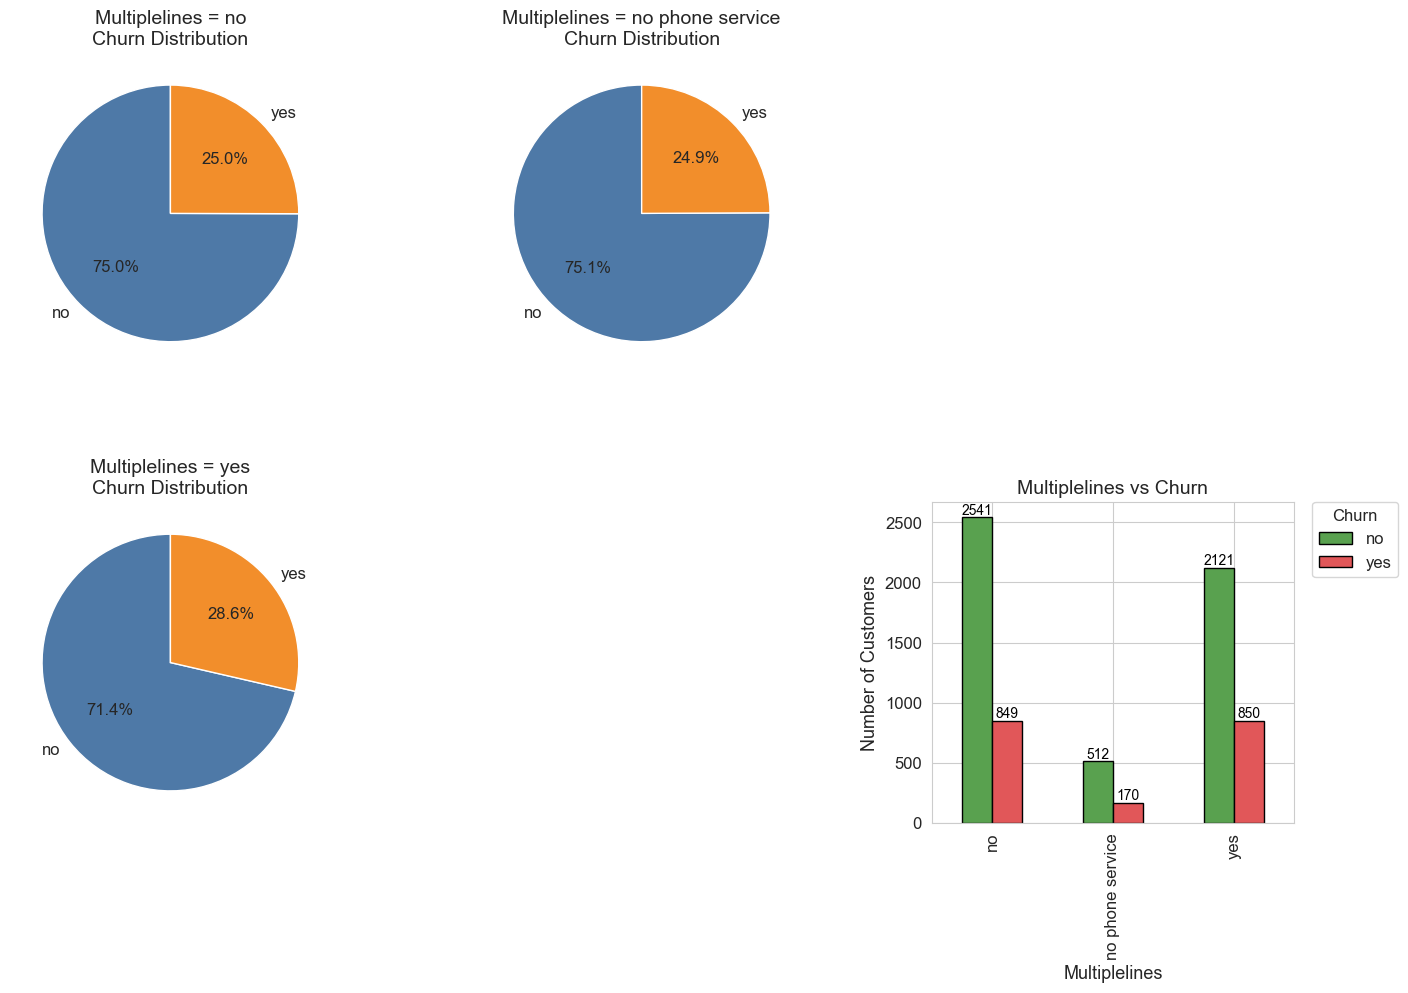

In [26]:
plot_cat_vs_churn_multi_pies(data, 'multiplelines')

Clients with multiplelines churn more than those without. This could be due to the fact that customers with multiple lines may have more complex needs and may be more likely to switch providers for better deals or services.

### 4.1.8 InternetService

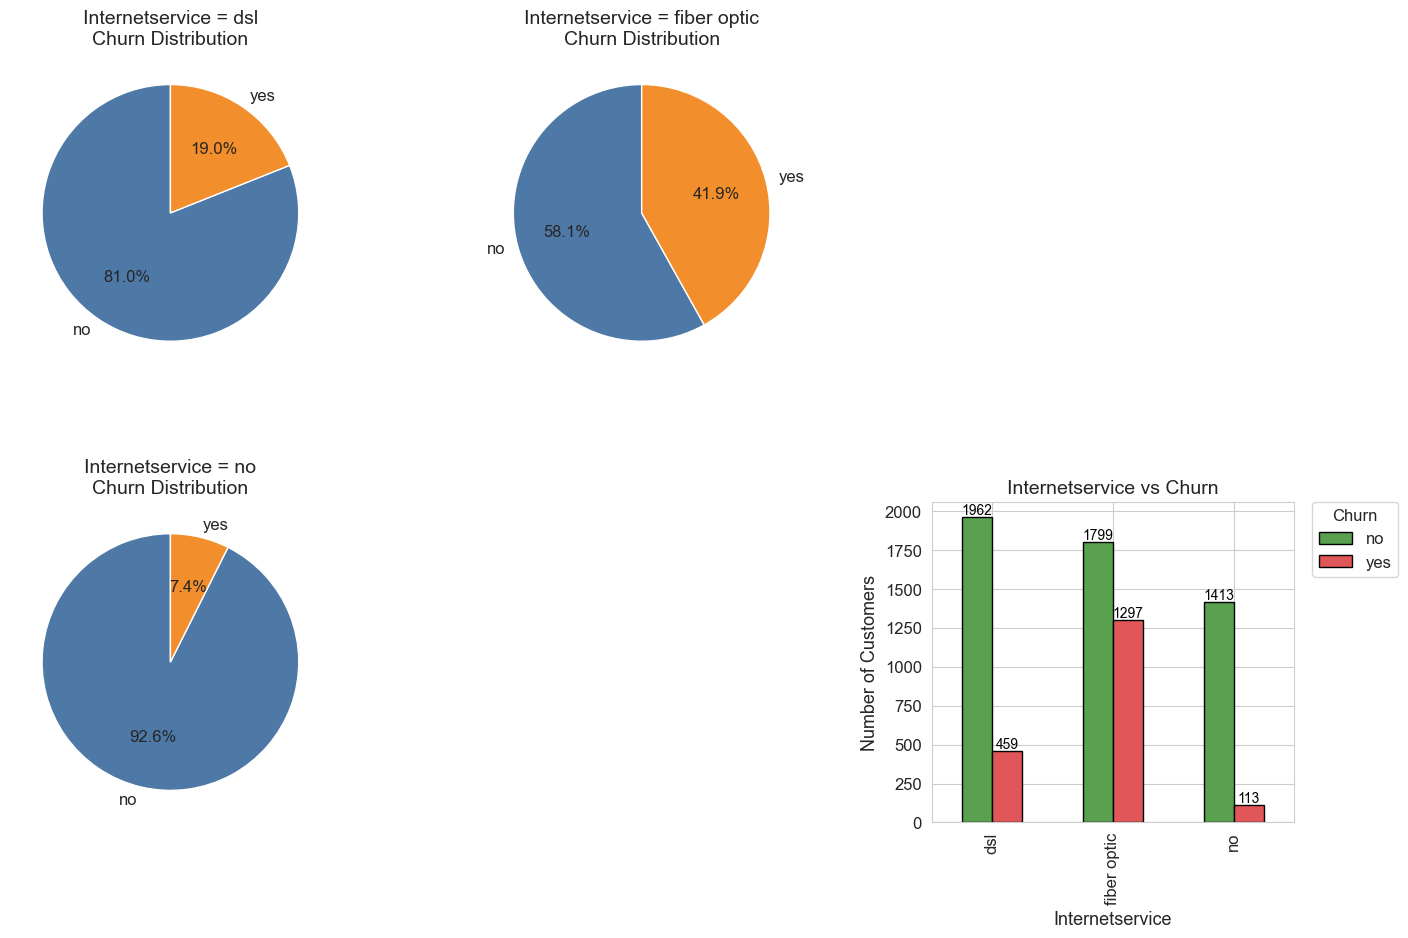

In [27]:
plot_cat_vs_churn_multi_pies(data, 'internetservice')

The internet service has a significant impact on churn rates. Customers with fiber optic service have the highest churn rate, while those with no internet have the lowest. It would be interesting to analyze it based on the price of the service, as fiber optic is usually more expensive than DSL. 

### 4.1.9 OnlineSecurity

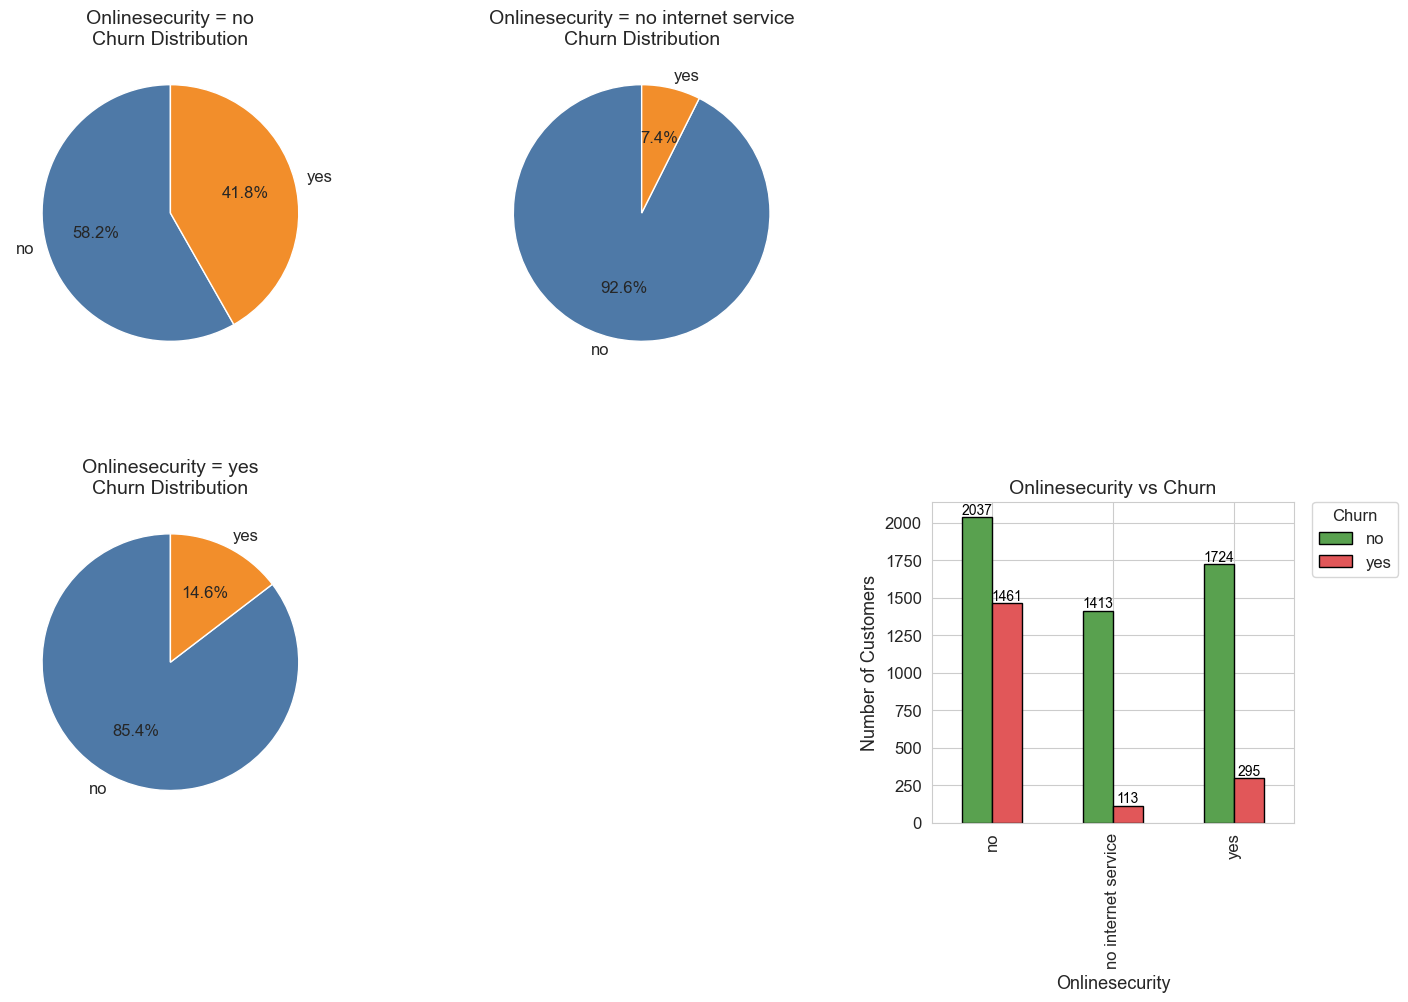

In [28]:
plot_cat_vs_churn_multi_pies(data, 'onlinesecurity')

The onlinesecurity column shows that customers who do not have online security services tend to churn more. 

In [29]:
counts = (
    data[data['internetservice'] == 'fiber optic']
    .groupby('onlinesecurity')['churn']
    .value_counts()
    .unstack(fill_value=0)
)
counts

churn,no,yes
onlinesecurity,,
no,1143,1114
yes,656,183


Customers with fiber optic and online security have a much lower churn rate than those without online security. This suggests that offering online security can help retain customers for this service.

### 4.1.10 Online Backup

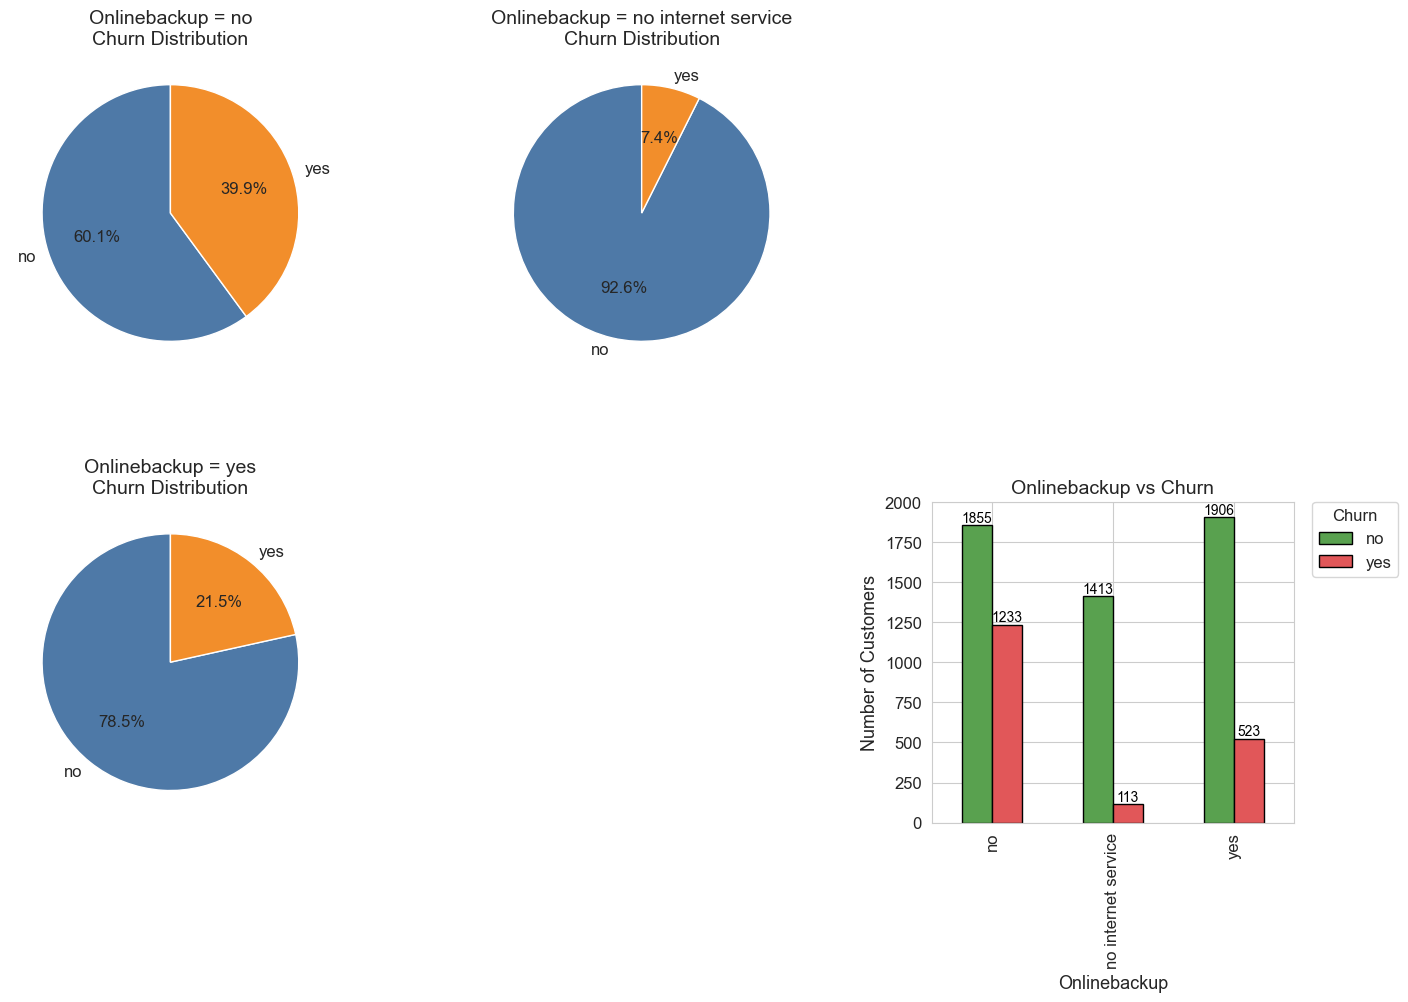

In [30]:
plot_cat_vs_churn_multi_pies(data, 'onlinebackup')

Customers with online backup have a significantly lower churn rate compared to those without it, suggesting that offering online backup services can be an effective strategy to improve customer retention. Customers with no internet service shows a high "no churn".

### 4.1.11 Device Protection

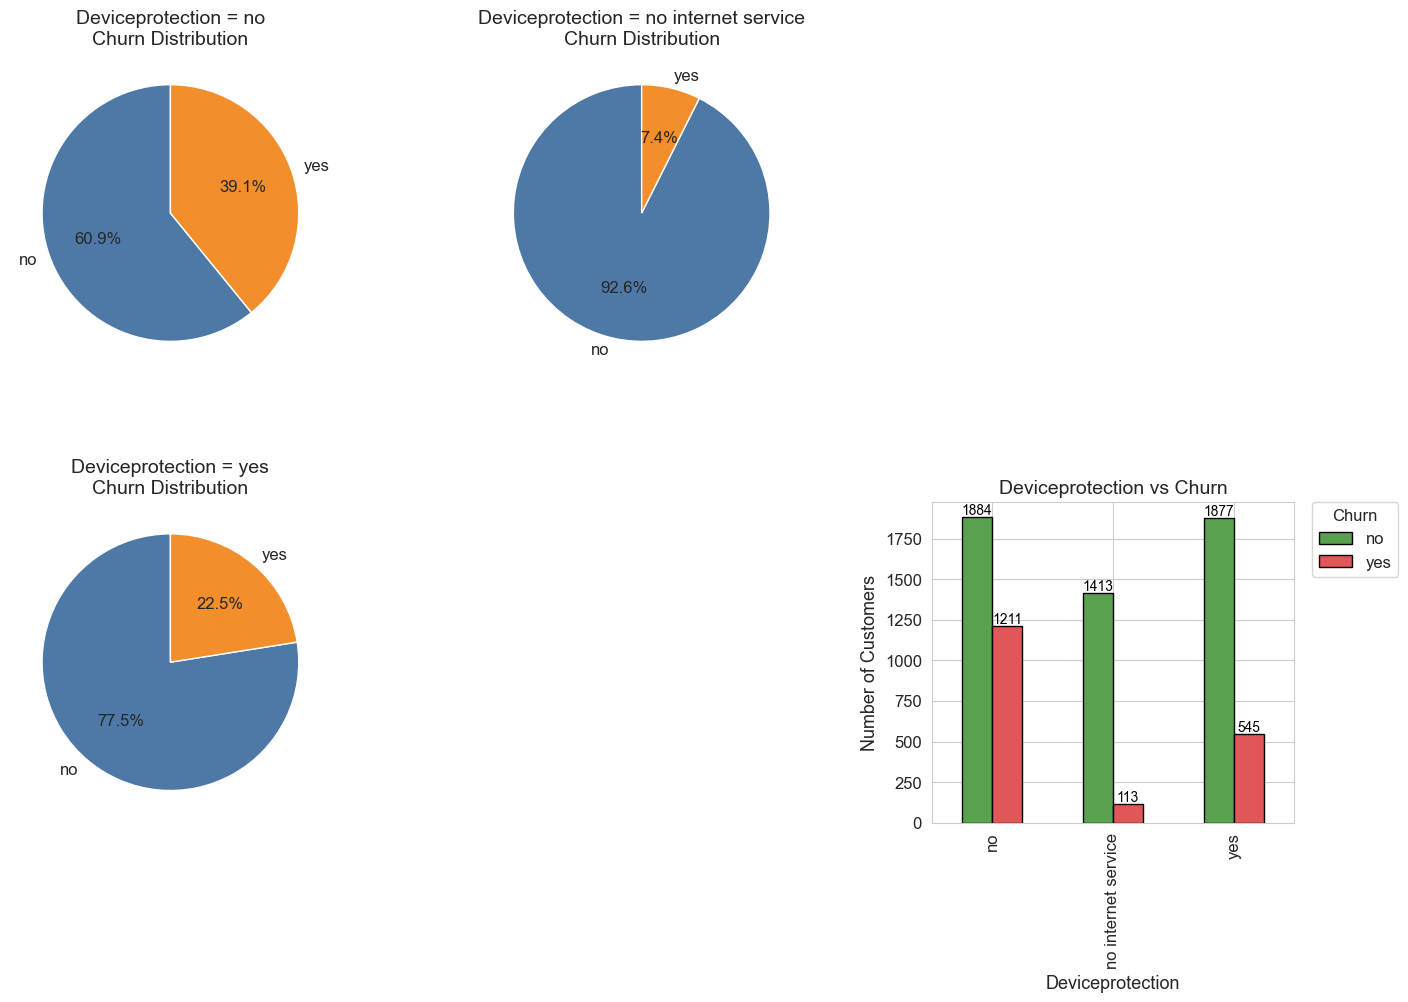

In [31]:
plot_cat_vs_churn_multi_pies(data, 'deviceprotection')

Customers with device protection have a lower churn rate compared to those without it. Customers with no internet service shows a high "no churn".

### 4.1.12 Tech Support

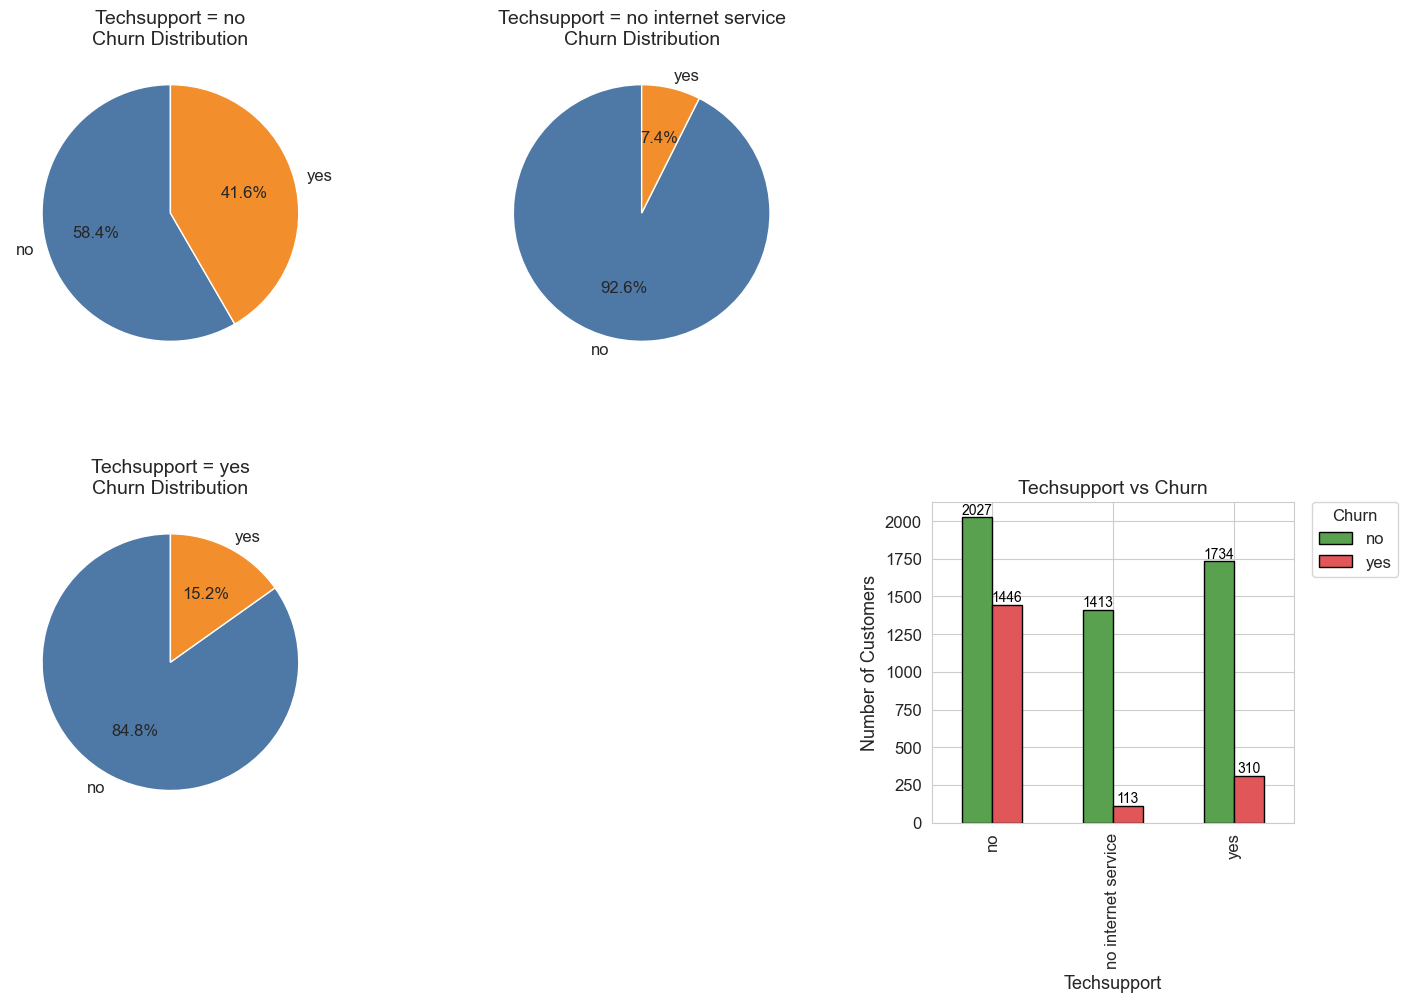

In [32]:
plot_cat_vs_churn_multi_pies(data, 'techsupport')

Customers with tech  support have a much lower churn rate compared to those without it, suggesting that providing support can significantly improve customer retention. Customers with no internet service shows a high "no churn".

### 4.1.13 Streaming TV

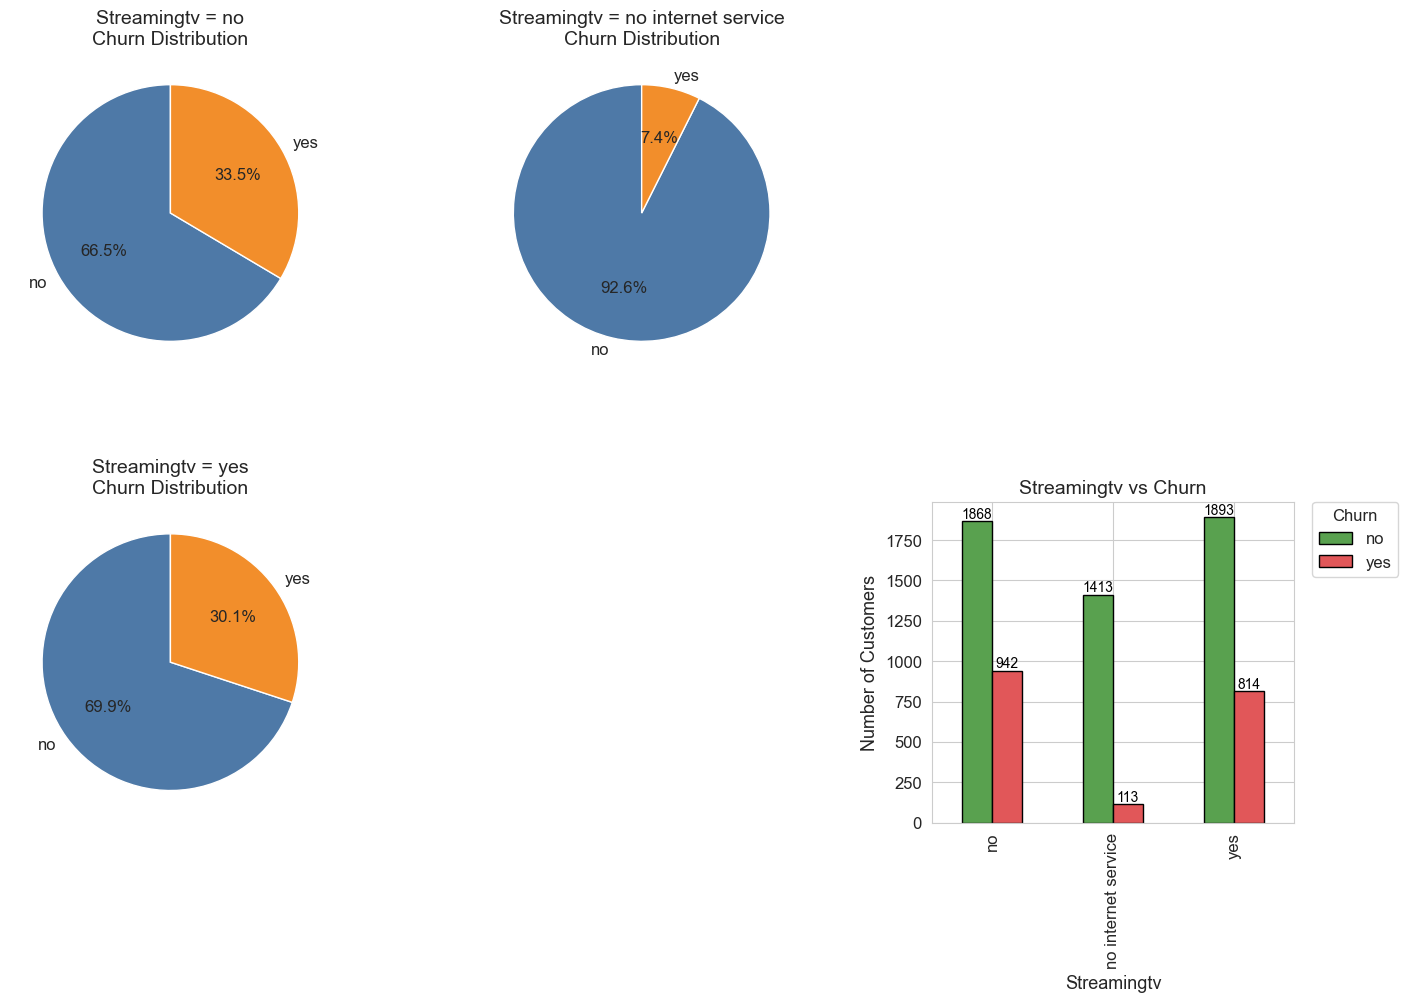

In [33]:
plot_cat_vs_churn_multi_pies(data, 'streamingtv')

Customers with streaming TV service have a slightly lower churn rate compared to those without it, while the difference is modest, it suggests that offering streaming TV may contribute to customer retention. As seen in other cases, customers without internet service have the lowest churn rate.

### 4.1.14 Streaming Movies

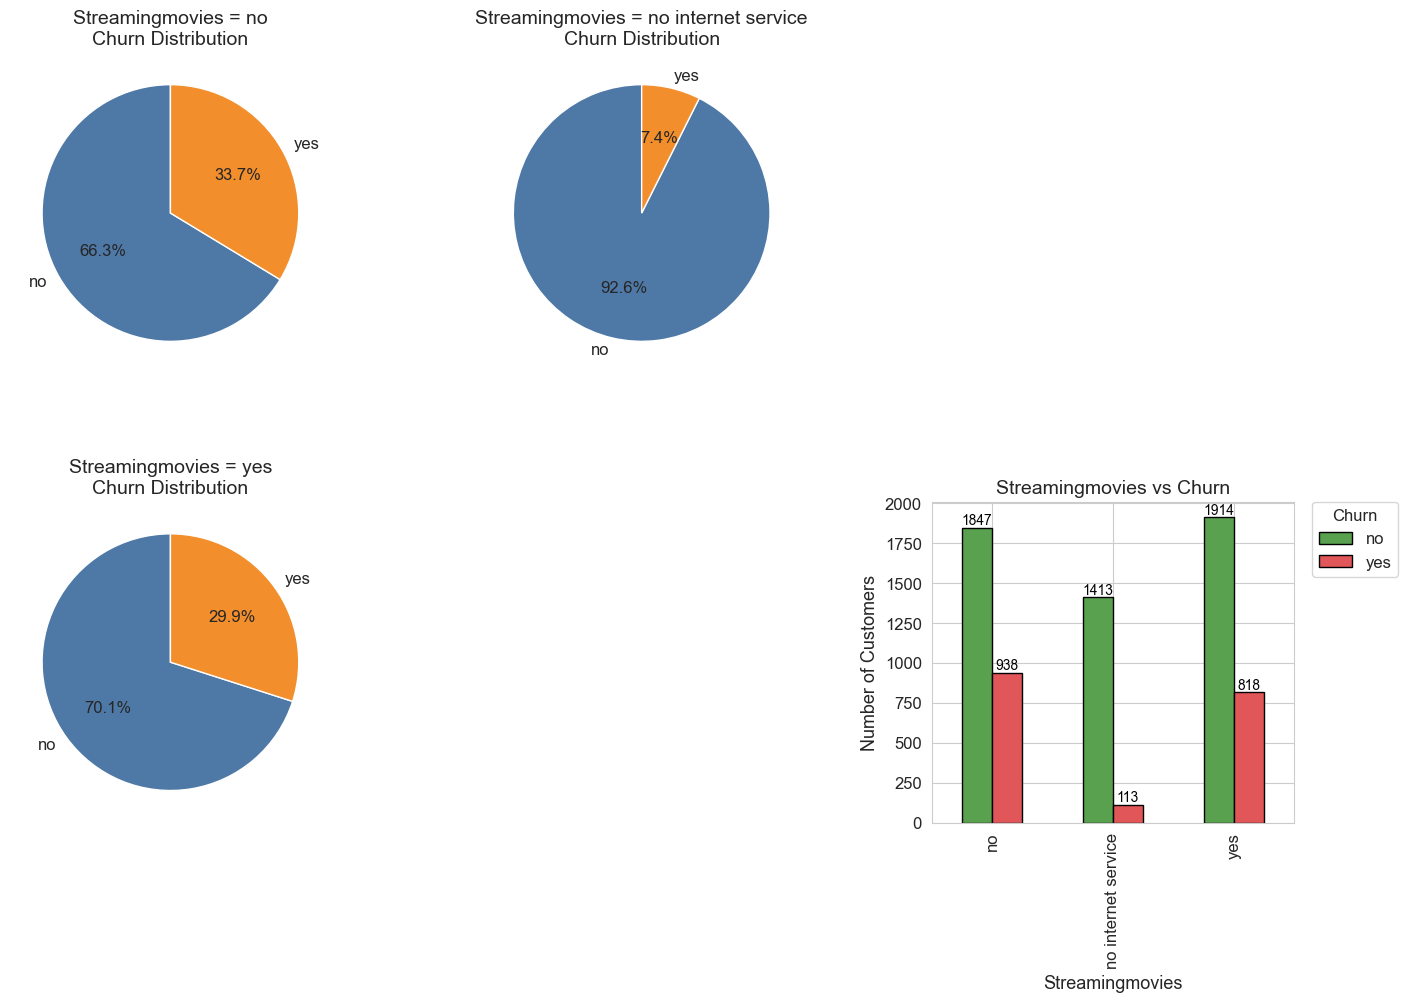

In [34]:
plot_cat_vs_churn_multi_pies(data, 'streamingmovies')

I would say this type of service behaves the same way as Streaming Tv.

### 4.1.15 Contract

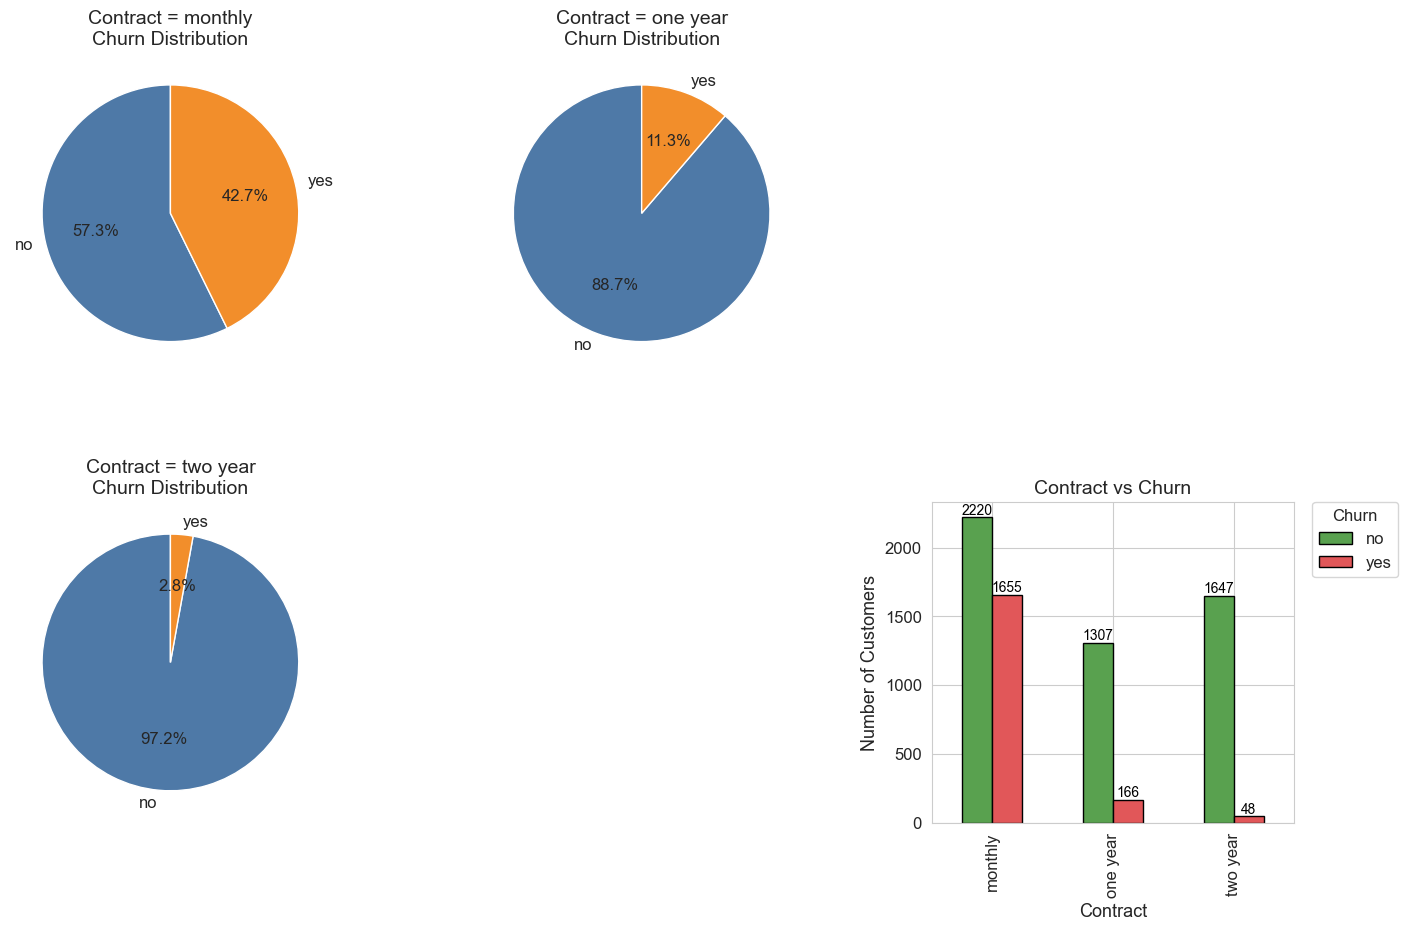

In [35]:
plot_cat_vs_churn_multi_pies(data, 'contract')

Customers with longer contract durations show significantly lower churn rates. Two-year contract holders have the lowest churn rate , followed by one-year contracts , while monthly contracts have the highest churn rate. This suggests that encouraging longer-term contracts can be a highly effective strategy for improving customer retention.

### 4.1.16 Paperless Billing

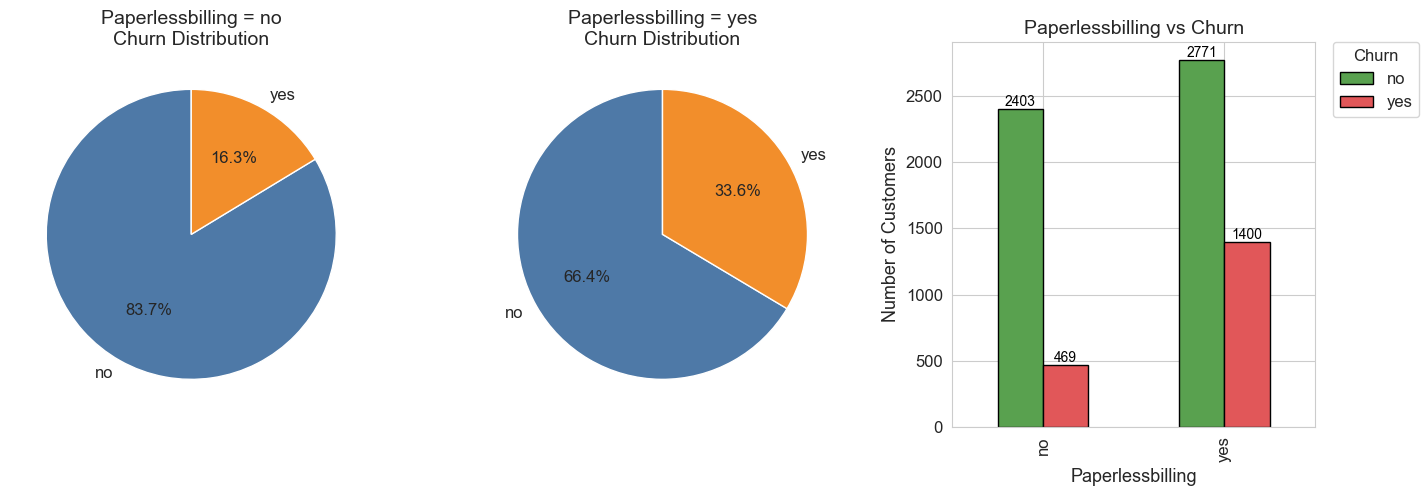

In [36]:
plot_cat_vs_churn_multi_pies(data, 'paperlessbilling')

Customers who do not use paperless billing have a much lower churn rate compared to those who do suggesting that paperless billing may be associated with higher churn, and the company might consider investigating why or offering alternatives to improve retention among these users.

### 4.1.17 Payment Method

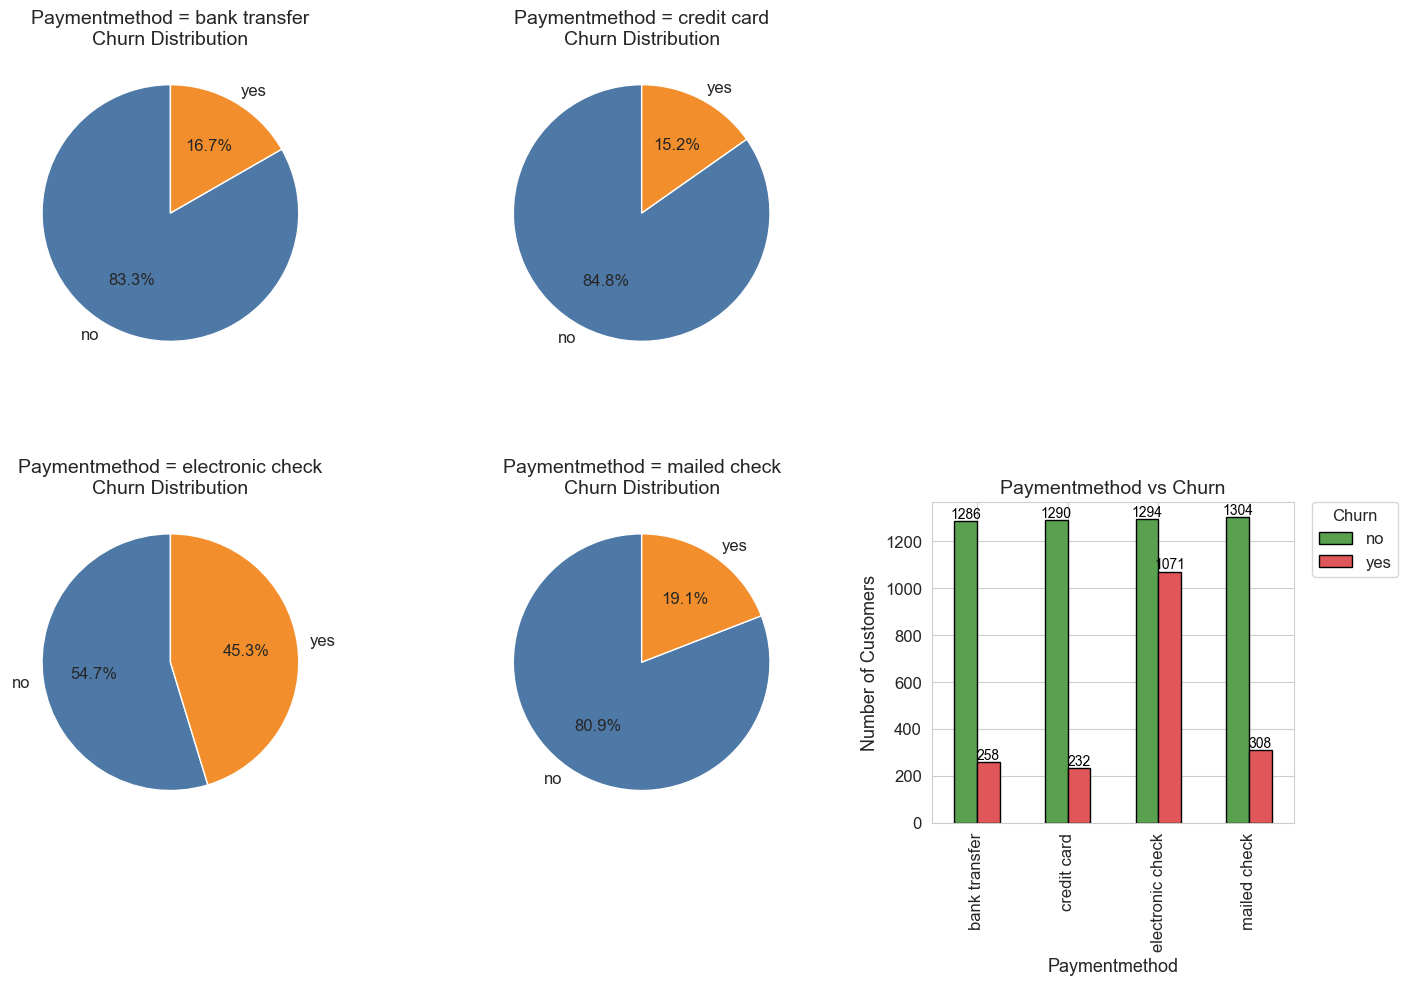

In [37]:
plot_cat_vs_churn_multi_pies(data, 'paymentmethod')

Customers who pay via electronic check have the highest churn rate, significantly more than those using other payment methods. In contrast, credit card and bank transfer users show the lowest churn rates. I would say a nice approach to this problem would be give benefits for other payment methods.

## 4.2 Numerical


The ratio is calculated as:

$$
\text{ratio} = \frac{\text{totalcharges}}{\text{tenure} \times \text{monthlycharges}}
$$

This ratio compares the actual total charges a customer has paid to the expected total charges, which would be the product of their tenure (how long they’ve been a customer) and their monthly charges.

In [38]:
# Ratio of total charges to tenure and monthly charges
data['ratio'] = data['totalcharges'] / (data['tenure'] * data['monthlycharges'])
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,ratio
0,female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,monthly,yes,electronic check,29.85,29.85,no,1.000000
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no,0.975830
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,monthly,yes,mailed check,53.85,108.15,yes,1.004178
3,male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer,42.30,1840.75,no,0.967034
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,monthly,yes,electronic check,70.70,151.65,yes,1.072489


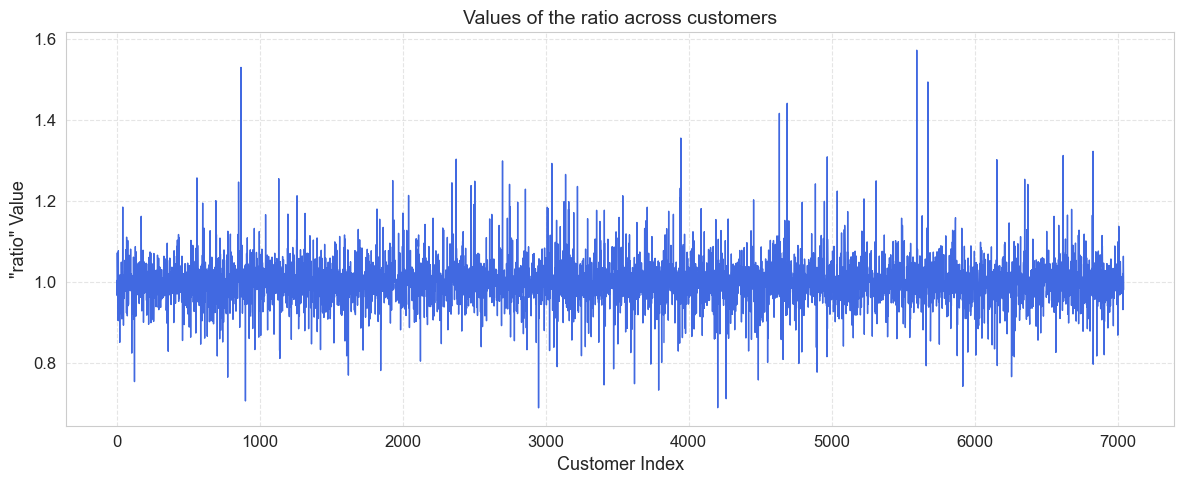

Minimum value of ratio: 0.6893564356435644
Maximum value of ratio: 1.5734536082474226


In [39]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['ratio'], color='royalblue', linewidth=1)
plt.title('Values of the ratio across customers')
plt.xlabel('Customer Index')
plt.ylabel('"ratio" Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Minimum value of ratio: {data['ratio'].min()}")
print(f"Maximum value of ratio: {data['ratio'].max()}")

The ratio varies significantly, ranging from a minimum of approximately 0.69 to a maximum of approximately 1.57. This indicates that the total amount paid by almost all customers does not correspond to the number of months multiplied by the monthly amount recorded in the table.

Some possible reasons for this variation may include:

- an extra fee for cases in which the customer uses more than the internet or phone limits contracted;

- partial payment of a monthly fee (for example, if the customer contracts service X on the 5th, the amount for that contracted month will be different from the rest of the months, since the remaining 25 days will be paid, not the entire month);

- late payment;

- an additional service;

1371


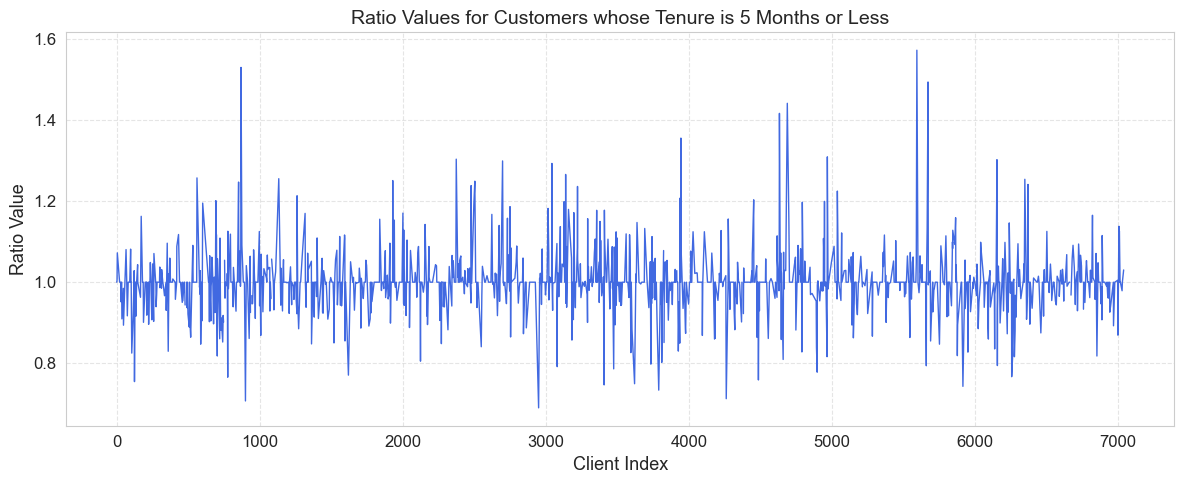

Minimum value of ratio: 0.6893564356435644
Maximum value of ratio: 1.5734536082474226


In [40]:
data5months = data[data['tenure'] <= 5]
print(len(data5months))    
plt.figure(figsize=(12, 5))
plt.plot(data5months.index, data5months['ratio'], color='royalblue', linewidth=1)
plt.title('Ratio Values for Customers whose Tenure is 5 Months or Less')
plt.xlabel('Client Index')
plt.ylabel('Ratio Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# min and max of ratio
print(f"Minimum value of ratio: {data5months['ratio'].min()}")
print(f"Maximum value of ratio: {data5months['ratio'].max()}")

4236


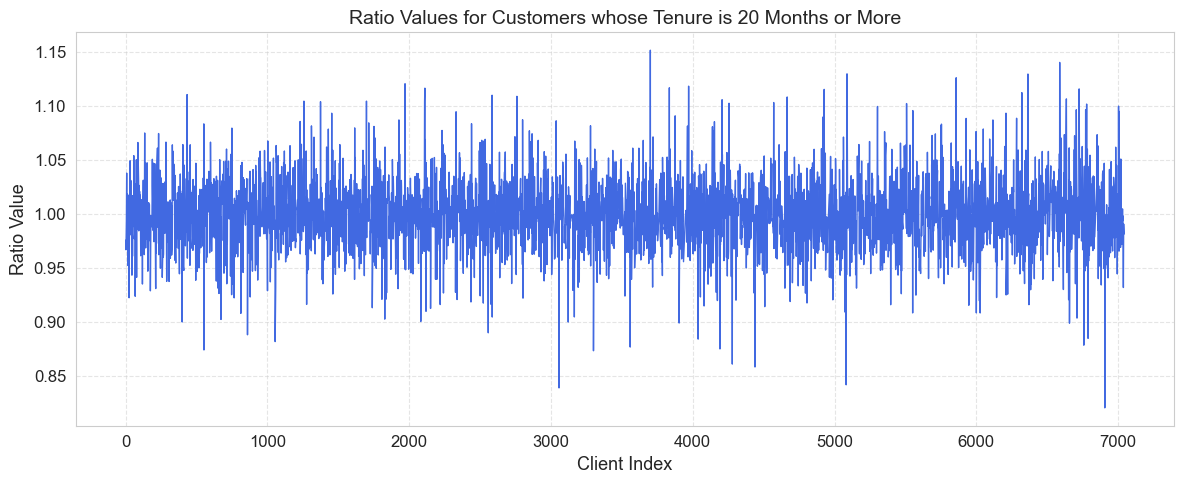

Minimum value of ratio: 0.8206417112299464
Maximum value of ratio: 1.151851851851852


In [41]:
data20months = data[data['tenure'] >= 20]
print(len(data20months))    
plt.figure(figsize=(12, 5))
plt.plot(data20months.index, data20months['ratio'], color='royalblue', linewidth=1)
plt.title('Ratio Values for Customers whose Tenure is 20 Months or More')
plt.xlabel('Client Index')
plt.ylabel('Ratio Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# min and max of ratio
print(f"Minimum value of ratio: {data20months['ratio'].min()}")
print(f"Maximum value of ratio: {data20months['ratio'].max()}")


In [42]:
print("Summary of ratio values:")
print("\n")
print("Ratio values for all clients:")
print(f"Minimum value of ratio: {data['ratio'].min()}")
print(f"Maximum value of ratio: {data['ratio'].max()}")
print("\n")
print("----------------------------------------")


print("Ratio values for clients with tenure <= 5 months:")
print(f"Minimum value of ratio: {data5months['ratio'].min()}")
print(f"Maximum value of ratio: {data5months['ratio'].max()}")
print("\n")
print("----------------------------------------")

print("Ratio values for clients with tenure >= 20 months:")
print(f"Minimum value of ratio: {data20months['ratio'].min()}")
print(f"Maximum value of ratio: {data20months['ratio'].max()}")

Summary of ratio values:


Ratio values for all clients:
Minimum value of ratio: 0.6893564356435644
Maximum value of ratio: 1.5734536082474226


----------------------------------------
Ratio values for clients with tenure <= 5 months:
Minimum value of ratio: 0.6893564356435644
Maximum value of ratio: 1.5734536082474226


----------------------------------------
Ratio values for clients with tenure >= 20 months:
Minimum value of ratio: 0.8206417112299464
Maximum value of ratio: 1.151851851851852


In [43]:
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,ratio
0,female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,monthly,yes,electronic check,29.85,29.85,no,1.000000
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no,0.975830
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,monthly,yes,mailed check,53.85,108.15,yes,1.004178
3,male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer,42.30,1840.75,no,0.967034
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,monthly,yes,electronic check,70.70,151.65,yes,1.072489


In [44]:

# data['churn_binary'] = data['churn'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# # Group by tenure and calculate churn rates
# churn_by_tenure = data.groupby('tenure')['churn_binary'].agg(['count', 'sum']).reset_index()
# churn_by_tenure['churn_rate'] = (churn_by_tenure['sum'] / churn_by_tenure['count']) * 100
# churn_by_tenure['no_churn_rate'] = 100 - churn_by_tenure['churn_rate']


# plt.figure(figsize=(15, 8))
# plt.bar(churn_by_tenure['tenure'], 
#         churn_by_tenure['no_churn_rate'], 
#         label='No Churn', 
#         color='#4E79A7', 
#         alpha=0.8)
# plt.bar(churn_by_tenure['tenure'], 
#         churn_by_tenure['churn_rate'], 
#         bottom=churn_by_tenure['no_churn_rate'], 
#         label='Churn', 
#         color='#F28E2B', 
#         alpha=0.8)

# plt.xlabel('Tenure (months)')
# plt.ylabel('Percentage (%)')
# plt.title('Churn Rate by Tenure (Monthly)')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

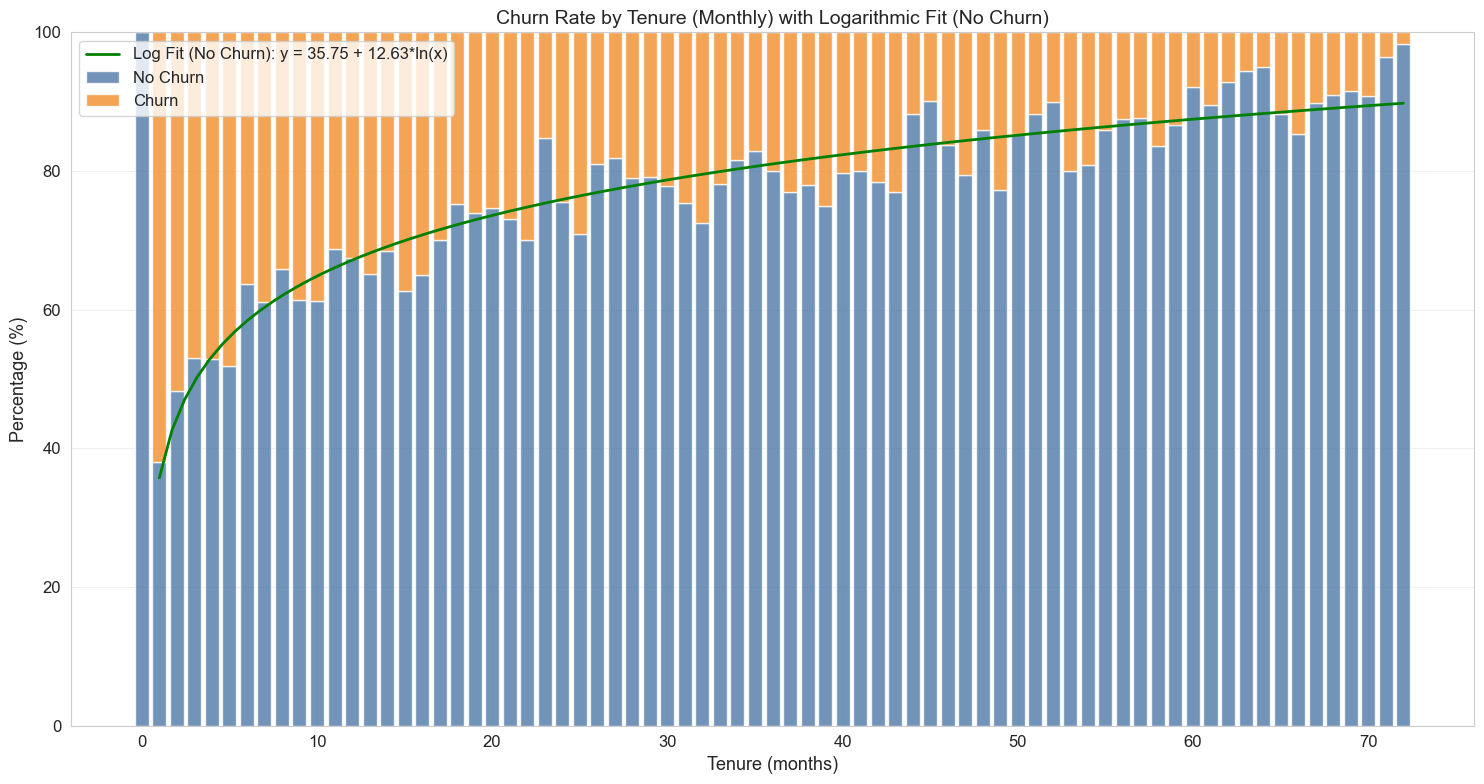

In [45]:
data['churn_binary'] = data['churn'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Group by tenure and calculate churn rates
churn_by_tenure = data.groupby('tenure')['churn_binary'].agg(['count', 'sum']).reset_index()
churn_by_tenure['churn_rate'] = (churn_by_tenure['sum'] / churn_by_tenure['count']) * 100
churn_by_tenure['no_churn_rate'] = 100 - churn_by_tenure['churn_rate']

# Fit a logarithmic model 
def log_func(x, a, b):
    return a + b * np.log(x)

# Filter out tenure values less than or equal to 0
filtered_data = churn_by_tenure[churn_by_tenure['tenure'] > 0].copy()


# Adjust the logarithmic model to the no_churn
params, _ = curve_fit(log_func, filtered_data['tenure'], filtered_data['no_churn_rate'])


x_values = np.linspace(1, filtered_data['tenure'].max(), 100)
y_values = log_func(x_values, *params)


plt.figure(figsize=(15, 8))
plt.bar(churn_by_tenure['tenure'], 
        churn_by_tenure['no_churn_rate'], 
        label='No Churn', 
        color='#4E79A7', 
        alpha=0.8)
plt.bar(churn_by_tenure['tenure'], 
        churn_by_tenure['churn_rate'], 
        bottom=churn_by_tenure['no_churn_rate'], 
        label='Churn', 
        color='#F28E2B', 
        alpha=0.8)

plt.plot(x_values, y_values, 'g-', label=f'Log Fit (No Churn): y = {params[0]:.2f} + {params[1]:.2f}*ln(x)', linewidth=2)

plt.xlabel('Tenure (months)')
plt.ylabel('Percentage (%)')
plt.title('Churn Rate by Tenure (Monthly) with Logarithmic Fit (No Churn)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The minimum and maximum ratio values for all clients range from approximately 0.69 to 1.57, showing considerable variability.

For clients with tenure less than or equal to 5 months, the ratio also spans this full range (0.69 to 1.57). This wide spread could be explained by partial payments of monthly fees theory.

Conversely, for clients with tenure of 20 months or more, the ratio values are narrower, ranging from about 0.82 to 1.15. Over longer tenures, partial month effects become less impactful in the ratio.

The logarithmic curve suggests that the likelihood of a customer not churning increases with tenure, but at a decreasing rate, that means: after a certain point, the increase in retention slows down, indicating that long-term customers are more stable.